## Python statistics essential training - 04_06_challenge

Standard imports

In [2]:
import math
import io

In [3]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp

%matplotlib inline

In [4]:
import scipy.stats
import scipy.optimize
import scipy.spatial

In [5]:
pop = pd.read_csv('grades.csv')

Using bootstrap on the polling data for mayor Green's grades, estimate the confidence interval for the fraction of citizens that give her a passing grade defined as > 5 

In [6]:
pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 1 columns):
grade    100 non-null float64
dtypes: float64(1)
memory usage: 880.0 bytes


In [7]:
pop.describe()

,grade
count,100.000000
mean,5.508561
std,1.984988
min,1.160899
25%,3.921372
50%,5.688527
75%,7.272162
max,9.120705


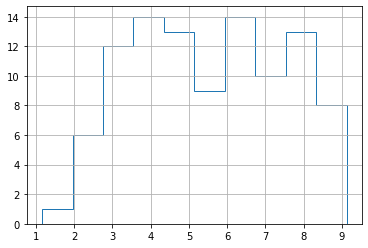

In [8]:
pop.grade.hist(histtype='step')

In [9]:
print('Percentage of students giving failing grade')
print(scipy.stats.percentileofscore(pop.grade,5))

Percentage of students giving failing grade
43.0


Create a bootstrap distribution from the population distribution by drawing 100 samples with replacement 1000 times

In [12]:
bootstrap = pd.DataFrame({"passing":[scipy.stats.percentileofscore(pop.sample(100,replace=True).grade,5) for i in range(1000)]})

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff7508abc18>]],
      dtype=object)

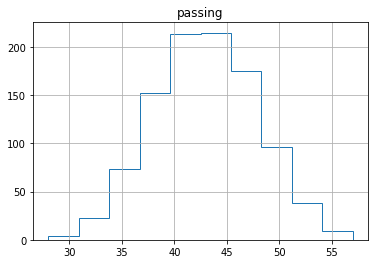

In [13]:
bootstrap.hist(histtype='step')

In [16]:
def confidence_interval(dist):
    return dist.quantile(0.025), dist.quantile(0.975)

In [29]:
print('The 95% confidence interval for proportion of students giving FAILING grade:')
confidence_interval(bootstrap.passing)

The 95% confidence interval for proportion of students giving FAILING grade:


(33.0, 53.0)

In [24]:
def bootstrapdist(grades,n=1000):
    return pd.DataFrame({'mean_frac_citizens':[(grades.sample(n=100,replace=True) >= 5).mean() for i in range(n)]})

In [25]:
bdist = bootstrapdist(pop.grade)

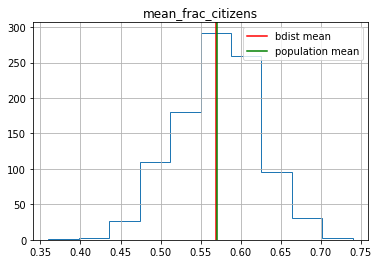

In [26]:
bdist.hist(histtype='step')
pp.axvline(x=bdist.mean_frac_citizens.mean(),color='r',label='bdist mean')
pp.axvline(x=(pop.grade >= 5).mean(),color='g',label='population mean')
pp.legend()

In [30]:
print('The 95% confidence interval for proportion of students giving PASSING grade:')
confidence_interval(bdist.mean_frac_citizens)

The 95% confidence interval for proportion of students giving PASSING grade:


(0.47, 0.67)